# RNNs, LSTMs
## Chris Rytting
Recurrent neural nets (RNNs) are not unlike traditional neural nets, but they are designed to overcome one of vanilla neural nets' most blatant shortcomings: the inability to use past information in this time period's classification.

## Activation function

When dealing with traditional neural nets, we have a function which maps input to some output, say

$$ \hat y = A(x) = tanh(W x) $$ 

where $x$ is a data instance, a single observation having several characterizing features (an input vector), $A$ is the function (the neural net),  and $y$ is a label, say a classification into one of several categories (usually a scalar). Our function is as shown at the very right, with a weight matrix $W$ and an activation function of $tanh$.

However, this approach doesn't have any notion of **sequence**. If we want a neural net to be expressive of such, as in predicting sentences where in order to decide what word comes next, one needs to know what came before. Therefore, we want to have a different topology, namely:

$$ \hat y_t = A (x_t) $$ 

in the case that one wants to predict the next instance in a sequence, or 

$$ \hat x_{t+1} = A(x_t)  \implies \hat x_{t+1} = A(A(A(..... A( x_1 )   )  )  ) $$ 

in the event that one wants to predict the next several instances in a sequence. The implication is obviously that one uses $x_{t+1}$ as the input for predicting $x_{t+1}$, $x_{t+2}$ as the input for predicting $x_{t+3}$ etc. This is the generally universal architecture of a recurrent neural net, as the two architectures are really the same.




So in practice, we have a neural net that takes an input $x_t$ and a neural network $A$ maps it to some output $h_t$:

<img src="./lstmimages/img1.png", width = 100, height = 100, >

{Images source: [1]}

But what if we care about what $h_{t-1}, h_{t-2}, ... , h_{t-n}$ looked like? What if this gives some insight into what $h_t$ should be? Unrolling the RNN (i.e. expanding the network/computation graph in such a way that we see how the computation graph of $x_t \to h_t$ relates to the computation graphs of $x_{t-1} \to h_{t-1}, x_{t-2} \to h_{t-2},..., x_{t-n} \to h_{t-n}$), we have

<img src="./lstmimages/img2.png", width = 500, height = 400>

We see that the input of $x_0$ will affect $h_1, h_2$, etc.

For example, imagine that I have the following sentences that I've heard:

"I was born in Spain""

and

"Mark is in class"

In this case, our vocabulary consists of the following words:

[I, was, born, in, Spain, Mark, is, class]

With a vanilla nn, since all but one of these words appears uniquely, we could classify with 100% accuracy. However, the word that will follow "in" depends on whether "in" is preceded by "is" or "born". If our net can remember what happened right before the word "in", though, we're sitting pretty.

<img src="./lstmimages/img3.png", width = 500, height = 400>


RNNs achieve just this. By way of a state vector, $h_t$, it keeps track of old information and can "remember" what happened in previous states so as to inform decisions it will make now. In theory, an RNN could learn the pattern of our language base above with 100% accuracy. 

<img src="./lstmimages/img5.png", width = 500, height = 400>

The activation function for RNNs is as follows:

$$ s_t = tanh(U x_t  + W s_{t-1}) $$
$$ h_t = softmax(V s_t) $$

## Backpropagation Through Time

Because RNNs are so different from normal neural nets, we need to modify the backpropagation algorithm in order to get the best results possible. The result is known as backpropagation through time. 

Consider differentiating $h_t$ with respect to W. $s_t$ is a function of $W$ as well, so we cannot treat it as a constant. In the same sense as normal backpropagation, we simply use the chain rule to find the derivative.

RNNs are supposed to learn to remember the past, and this is their value, as they were built around the idea of sequences. However, with long sequences, there is a problem that arises with backpropagation through time. The problem is known as the vanishing/exploding gradient problem.


## Vanishing gradient

With sigmoid and tanh functions, when you differentiate with resepect to a sigmoid layer, if inputs to the sigmoid layer are very far from the origin, the derivative will be nearly zero. 

We can have exploding gradients as well, but these are more obvious, since the vanishing gradient problem is manifest in long-term dependencies not being learned. However, an exploding gradient is obvious because your gradients will become NaN, and the solution to these is simple, as one can simply set an upper threshold to "clip" exploding gradients, which is an effective solution. The vanishing gradient is more subtle and will just result in poor performance of the net. As a solution, we have the LSTM.

## LSTMs



LSTMs (stands for Long Short Term Memory) are the most typically used type of RNN, as they are unique in the sense that they can learn long-term dependencies which vanilla RNNs are incapable of learning. They avoid the vanishing gradient problem through their gating mechanism. The cell state is an addition of many different components as opposed to a multiplication of them. 

<img src="./lstmimages/img4.png", width = 500, height = 400>

This is due to a more sophisticated activation function in $A$, the meat of our neural net.

<img src="./lstmimages/img6.png", width = 500, height = 400>

A sigmoid function can either let complete flow (by mapping to 1) or no flow (by mapping to 0). The key to an LSTM is the cell state, $C_t$, which is the straight black line we see running along the top of the cell. If needs be, it is easy for this cell state to proceed unchanged as it only faces some minor interactions along the way.
The device in an LSTM's activation function that sets it apart from a standard RNN are its gates. 

A gate consists of a sigmoid function followed by a pointwise multiplication. 

First, we have the forget gate, which was introduced in the year 1999 by gers et. al:

$$f_t = \sigma ( W_f \cdotp [h_{t-1}, x_t] + b_f) $$

This gate looks at the input $x_t$ and the output from the last state and outputs a number between 0 and 1 by which to multiply everything in the cell state i.e. what to forget from the cell state.

Next, we have an "input gate layer", which decides which values to update and by how much, while simultaneously, a $tanh$ layer creates a vector of candidate values to be added to the state. In conjunction with each other, these two layers perform an update to the state.

$$i_t = \sigma ( W_i \cdotp [h_{t-1}, x_t] + b_i) $$

$$\tilde C_t = tanh ( W_C \cdotp [h_{t-1}, x_t] + b_C) $$

Then we actually make an update to the cell state by combining $f_t, i_t$, and $\tilde C$ in the following equation:

$$ C_t = C_{t-1} \ast f_t + \tilde C \ast i_t $$

Lastly, we want to have an output at this step, but need to pass it through a $tanh$ layer and an "output gate" so that 

$$o_t = \sigma(W_0 \cdotp [h_{t-1}, x_t] + b_o)$$
$$h_t = tanh(C_t) \ast o_t $$

Summing up, we've decided what to forget from the cell state with our forget gate $f_t$, what to learn with our "input gate" (which decides what to remember and how strongly to do so), and what to remember and decide with our "output gate". These three types of gates allow for an LSTM to remember and forget what it needs to in order to learn effectively.

There are variations of LSTM's, though. For example, some LSTMs use peephole connections, which means that they allow each of the gates to see the cell state. This effectively allows the cell state to control the gates, as Gers and Schmidhuber argued was necessary in their 2000 paper. Mathematically, we have

$$f_t = \sigma ( W_f \cdotp [C_{t-1},h_{t-1}, x_t] + b_f) $$

$$i_t = \sigma ( W_i \cdotp [C_{t-1},h_{t-1}, x_t] + b_i) $$

$$o_t = \sigma(W_0 \cdotp [C_t, h_{t-1}, x_t] + b_o)$$

Another variation is getting rid of the input gate and deciding to input based on how much we forget in the forget gate:

$$ C_t = C_{t-1} \ast f_t + \tilde C \ast (1 - f_t)$$

A Gated Recurrent, or GRU, combines the forget and input gates into a single "update" gate, and folds the state $C_t$ 
into the output $h_t$, resulting in a simpler topology. The equations are as follows:

$$ z_t = \sigma(W_z \cdotp [h_{t-1}, x_t]) $$

$$ r_t = \sigma(W_r \cdotp [h_{t-1}, x_t]) $$

$$ \tilde h_t = tanh(W \cdotp [r_t \ast h_{t-1}, x_t]) $$

$$ h_t = (1- z_t) \ast h_{t-1} + z_t \ast \tilde h_t$$

There are many more variations on the standard LSTM architecture, but according to Greff et. al (https://arxiv.org/pdf/1503.04069.pdf), which to my knowledge is the most extensive study on the different LSTM architectures, none of these architectures can significantly improve upon the standard LSTM architecture, and that the key components to its success are the forget and output gates (since the block output can in principle grow unbounded).

GRUs are similar to LSTMs but have one less gate and have smaller parameter matrices. Performance is comparable, and it isn't clear which is better. GRUs are quicker to train, but LSTMs probably have greater expressivity, so there is a tradeoff.

# Abe Frandsen

Uses a package called passage. I would recommend using tensorflow as passage is, in the creators' words, "very alpha, work in progress."

2 datasets |D1| > |D2|

Abe compared the results of random forest classifiers and recurrent neural nets, and logistic regression and found that RNNs provide the most accurate framework. However, Abe didn't try LSTMs or different GRU architectures, he simply toyed around with parameters (e.g. the size of hidden layers) using a 50-25-25 train-test-validation split.

DATA: 

Simple

Image

Freetext

Coded Data

    Drug Codes
    
    Procedure Codes
    
    Diagnosis Codes

Classification:
    
    hard vs. soft classification
    
Accuracy 
    
    Natural accuracy metric
        
        Fallback of missing a positive diagnosis is different than falsely diagnosing someone who isn't sick.
    

The topology of his net is as follows:

An input layer with the dimensionality of the one hot vectors (ICD-9 diagnosis codes and CCS symbolic sequences (a truncation of ICD-9 codes)) being passed in to be classified. A GRU layer, a dense feedforward layer, and a two dimensional softmax layer, which converts the raw values to probabilities. This analysis was conducted on Chronic Kidney Disease (CKD) and Diabetes Mellitus (DM).

The best results were with the most number of nodes possible in the feedforward layer (256) and either the least possible or most possible in the recurrent layer.

Accuracy: RNN > LR > RF

Speed: LR > RF > RNN

Now let's look at an LSTM demo:

First, we'll import some necessary libraries:

In [18]:
import numpy as np                    #computation
import pandas as pd                   #data manipulation and visualization
import tensorflow as tf               #deep learning
from tensorflow.python.framework import dtypes
from tensorflow.contrib import learn  
import seaborn                        #pretty plots

Now let's define some helper functions to load in our data:

In [19]:
def rnn_data(data, time_steps, labels=False):
    """
    creates new data frame based on previous observation
      * example:
        l = [1, 2, 3, 4, 5]
        time_steps = 2
        -> labels == False [[1, 2], [2, 3], [3, 4]]
        -> labels == True [2, 3, 4, 5]
    """
    rnn_df = []
    for i in range(len(data) - time_steps):
        if labels:
            try:
                rnn_df.append(data.iloc[i + time_steps].as_matrix())
            except AttributeError:
                rnn_df.append(data.iloc[i + time_steps])
        else:
            data_ = data.iloc[i: i + time_steps].as_matrix()
            rnn_df.append(data_ if len(data_.shape) > 1 else [[i] for i in data_])
    return np.array(rnn_df)


def split_data(data, val_size=0.0, test_size=0.1):
    """
    splits data to training, validation and testing parts
    """
    ntest = int(round(len(data) * (1 - test_size)))
    nval = int(round(len(data.iloc[:ntest]) * (1 - val_size)))

    df_train, df_val, df_test = data.iloc[:nval], data.iloc[nval:ntest], data.iloc[ntest:]

    return df_train, df_val, df_test


def prepare_data(data, time_steps, labels=False, val_size=0.00, test_size=0.10):
    """
    Given the number of `time_steps` and some data,
    prepares training, validation and test data for an lstm cell.
    """
    df_train, df_val, df_test = split_data(data, val_size, test_size)
    return (rnn_data(df_train, time_steps, labels=labels),
            rnn_data(df_val, time_steps, labels=labels),
            rnn_data(df_test, time_steps, labels=labels))


def generate_data(fct, x, time_steps, seperate=False):
    """generates data with based on a function fct"""
    data = fct(x)
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)
    train_x, val_x, test_x = prepare_data(data['a'] if seperate else data, time_steps)
    train_y, val_y, test_y = prepare_data(data['b'] if seperate else data, time_steps, labels=True)
    return dict(train=train_x, val=val_x, test=test_x), dict(train=train_y, val=val_y, test=test_y)

def load_csvdata(rawdata, time_steps, seperate=False):
    data = rawdata
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)
    train_x, val_x, test_x = prepare_data(data['a'] if seperate else data, time_steps)
    train_y, val_y, test_y = prepare_data(data['b'] if seperate else data, time_steps, labels=True)
    return dict(train=train_x, val=val_x, test=test_x), dict(train=train_y, val=val_y, test=test_y)




Let's define the actual LSTM model:

In [20]:
def lstm_model(time_steps, rnn_layers, dense_layers=None):
    """
    Creates a deep model based on:
        * stacked lstm cells
        * an optional dense layers
    :param time_steps: the number of time steps the model will be looking at.
    :param rnn_layers: list of int or dict
                         * list of int: the steps used to instantiate the `BasicLSTMCell` cell
                         * list of dict: [{steps: int, keep_prob: int}, ...]
    :param dense_layers: list of nodes for each layer
    :return: the model definition
    """

    def lstm_cells(layers):
        if isinstance(layers[0], dict):
            return [tf.nn.rnn_cell.DropoutWrapper(tf.nn.rnn_cell.BasicLSTMCell(layer['steps'],
                                                                               state_is_tuple=True),
                                                  layer['keep_prob'])
                    if layer.get('keep_prob') else tf.nn.rnn_cell.BasicLSTMCell(layer['steps'],
                                                                                state_is_tuple=True)
                    for layer in layers]
        return [tf.nn.rnn_cell.BasicLSTMCell(steps, state_is_tuple=True) for steps in layers]

    def dnn_layers(input_layers, layers):
        if layers and isinstance(layers, dict):
            return learn.ops.dnn(input_layers,
                                 layers['layers'],
                                 activation=layers.get('activation'),
                                 dropout=layers.get('dropout'))
        elif layers:
            return learn.ops.dnn(input_layers, layers)
        else:
            return input_layers

    def _lstm_model(X, y):
        stacked_lstm = tf.nn.rnn_cell.MultiRNNCell(lstm_cells(rnn_layers), state_is_tuple=True)
        x_ = learn.ops.split_squeeze(1, time_steps, X)
        output, layers = tf.nn.rnn(stacked_lstm, x_, dtype=dtypes.float64)
        output = dnn_layers(output[-1], dense_layers)
        return learn.models.linear_regression(output, y)

    return _lstm_model


Now, we'll train the model and see some results:

In [21]:
#Model parameters
timesteps = 10
rnnlayers = [{'steps': timesteps}]
denselayers = [10,10]

#Estimator parameters
nclasses = 1
batchsize = 100
epochs = 10000
optmethod = 'Adam'
learningrate = .01

dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y %H:%M')
rawdata = pd.read_csv("RealMarketPriceDataPT.csv", 
                   parse_dates={'timeline': ['date', '(UTC)']}, 
                   index_col='timeline', date_parser=dateparse)

#split data into features/labels and train/test
X, y = load_csvdata(rawdata, timesteps, seperate=False)

#instantiate a TensorFlowEstimator instance using our LSTM model.
regressor = \
learn.TensorFlowEstimator(model_fn=lstm_model(timesteps, rnnlayers, \
    denselayers), n_classes=nclasses, batch_size=batchsize, \
    steps=epochs, optimizer=optmethod, learning_rate=learningrate)

#Fit estimator
regressor.fit(X['train'], y['train'])

#Extract predictions from estimator and find average error
predictions = regressor.predict(X['test'])
mae = mean_absolute_error(y['test'], predictions)

INFO:tensorflow:Using config: {'task': 0, 'save_summary_steps': 100, 'keep_checkpoint_max': 5, 'save_checkpoints_secs': 60, 'tf_config': intra_op_parallelism_threads: 4
inter_op_parallelism_threads: 4
gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'master': '', 'keep_checkpoint_every_n_hours': 10000, 'tf_random_seed': 42, 'num_ps_replicas': 0}
INFO:tensorflow:Using config: {'task': 0, 'save_summary_steps': 100, 'keep_checkpoint_max': 5, 'save_checkpoints_secs': 60, 'tf_config': intra_op_parallelism_threads: 4
inter_op_parallelism_threads: 4
gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'master': '', 'keep_checkpoint_every_n_hours': 10000, 'tf_random_seed': 42, 'num_ps_replicas': 0}
Instructions for updating:
Please use tf.unpack instead.
Instructions for updating:
Please use tf.unpack instead.
Instructions for updating:
Please use tf.contrib.layers.stack instead.
Instructions for updating:
Please use tf.contrib.layers.stack instead.
INFO:tensorflow:Create CheckpointSav

Error: 1.74089382858


Error: 1.74089382858


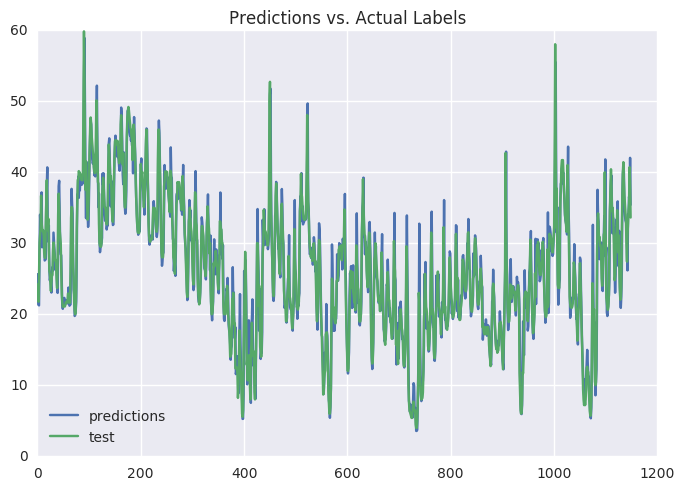

In [23]:
print "Error: {}".format(mae)
plt.title('Predictions vs. Actual Labels')
plt.plot(predictions, label='predictions')
plt.plot(y['test'], label='test')
plt.legend(loc = 'best')
plt.show()

## Sources

[1] http://colah.github.io/posts/2015-08-Understanding-LSTMs/

[2] https://github.com/tgjeon/TensorFlow-Tutorials-for-Time-Series

[3] http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/